# Introduction to Machine Learning and Data Mining (CS4049)                                                      
## Assessment 2

In [ ]:
#IMPORTS 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## 1. Random Sampling.
Instructions: Use a random sample of 10K instances drawn from the ~61K instances in the secondary mushroom data, and explain the random sampling code cell(s).

In [76]:
# #imports pandas so we can read and work with the dataset
# import pandas as pd 

#reads the mushroom data file, and also tells pandas that the data is seperated by semilcolons
df = pd.read_csv("MushroomDataset/secondary_data.csv", sep=";")

# df.head()
# df.shape

#pick 10k random rows from the whole dataset
df_sample = df.sample(n=10000, random_state= 42)

#shows how many rows and columns the sample has 
df_sample.shape

# df_sample.head(10000)

(10000, 21)

The original secondary mushroom dataset (secondary data file) has around 61k rows of data. Working with the full dataset can take more time and use way more computer power when analysing or training machine learning models, or even trying out different experiments. To make the process faster and easier to manage, based on the instructions, I created a smaller version of the data by randomly selecting 10,000 rows out of the original ~61k rows, using the sample() function in pandas.

Random sampling is useful because it still keeps the important format and pattern of the full dataset. Since evry row has the same chance of being chosen to represent the full dataset, the 10k sample is shows that it represents the full data well. This means my results should still be meaningful even though I am working with less rows.

I also included 'random_state=42' so that the same 10k rows are chosen every time I run the notebook. Doing it this way supports reproducibility, which is an important terminology in machine learning. Reproducibility means getting consistent results when using the same data and methods (National Academies of Sciences, Engineering, and Medicine, 2019). 

Setting a random state makes sure that anyone who runs my notebook will get the same ample and be able to repeat my results.


## 2. Exploratory Data Analysis (EDA).
Instructions: Create appropriate visualisations to explore your dataset and summarrise your findings about the data. Highlight findings relevant to the model fitting stage.

Before traning any machine learning model, it is very important to study the data to understand what the dataset looks like and whether there are any patterns or even potential issues. The mushrrom dataset contains different physical features of mushrooms, and our goal is to predict whether a mushroom is edible or poisonous (the class). These simple checks and visualizations I'll cary out in this question will help me see how the data behaves and what matters when fitting a machine learning model.

In [77]:
#checks dastaset structure
df_sample.info()

#checks for missing values
df_sample.isna().sum()

# df_sample.head()
# df_sample.shape

# df_sample.isna().sum()

# df_sample['class'].value_counts()

# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.countplot (x=df_sample['class'])
# plt.title("Class Distribution")
# plt.show()

# plt.figure(figsize = (8,4))
# sns.countplot(x=df_sample['cap-color'])
# plt.title("Cap Color Distribution")
# plt.show()

# plt.figure(figsize = (8,4))
# sns.countplot(x=df_sample['habitat'])
# plt.title("Habitat Distribution")
# plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt

# cols = df_sample.columns

# plt.figure(figsize=(18,30))

# for i, col in enumerate(cols, 1):
#     plt.subplot(7,3, i)
#     sns.countplot(x=df_sample[col], order=df_sample[col].value_counts().index)
#     plt.title(col)
#     plt.xticks(rotation=45, fontsize=8)

# plt.tight_layout()
# plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 11541 to 54344
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 10000 non-null  object 
 1   cap-diameter          10000 non-null  float64
 2   cap-shape             10000 non-null  object 
 3   cap-surface           7711 non-null   object 
 4   cap-color             10000 non-null  object 
 5   does-bruise-or-bleed  10000 non-null  object 
 6   gill-attachment       8367 non-null   object 
 7   gill-spacing          5776 non-null   object 
 8   gill-color            10000 non-null  object 
 9   stem-height           10000 non-null  float64
 10  stem-width            10000 non-null  float64
 11  stem-root             1572 non-null   object 
 12  stem-surface          3821 non-null   object 
 13  stem-color            10000 non-null  object 
 14  veil-type             516 non-null    object 
 15  veil-color          

class                      0
cap-diameter               0
cap-shape                  0
cap-surface             2289
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         1633
gill-spacing            4224
gill-color                 0
stem-height                0
stem-width                 0
stem-root               8428
stem-surface            6179
stem-color                 0
veil-type               9484
veil-color              8786
has-ring                   0
ring-type                418
spore-print-color       8978
habitat                    0
season                     0
dtype: int64

Thoose 2 checks tell me the data types of each field in my dataset and whether there are any missing values. The dataset has no missing values, which makes preprocessing easier before training a machine learning model.

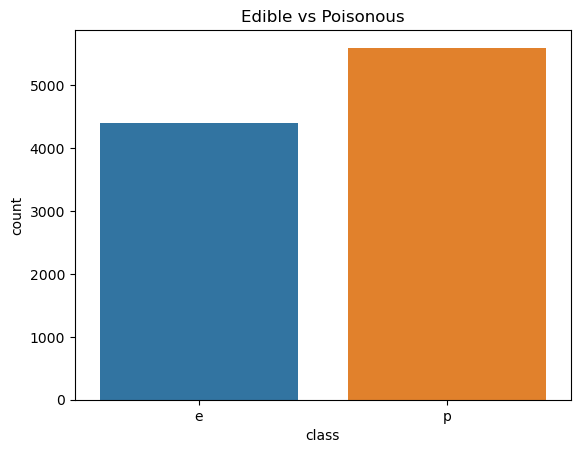

In [78]:
# #this is for importing libraries for the plotting
# import seaborn as sns
# import matplotlib.pyplot as plt

#this creates a bar chart showing how many mushrooms are edible vs those that are poisonous
sns.countplot(data = df_sample, x='class')

#adds a title to the chart
plt.title("Edible vs Poisonous")

#displays what its plotted
plt.show()

This plot shows how many mushrooms are edible, and the ones that are poisonous in my sample dataset. The classes look a bit balanced, which is very helpful because having a balanced dataset allows the machine learning model to learn bith classes equally without needing any special techniques for resampling or anything of the sort (Géron, 2019).

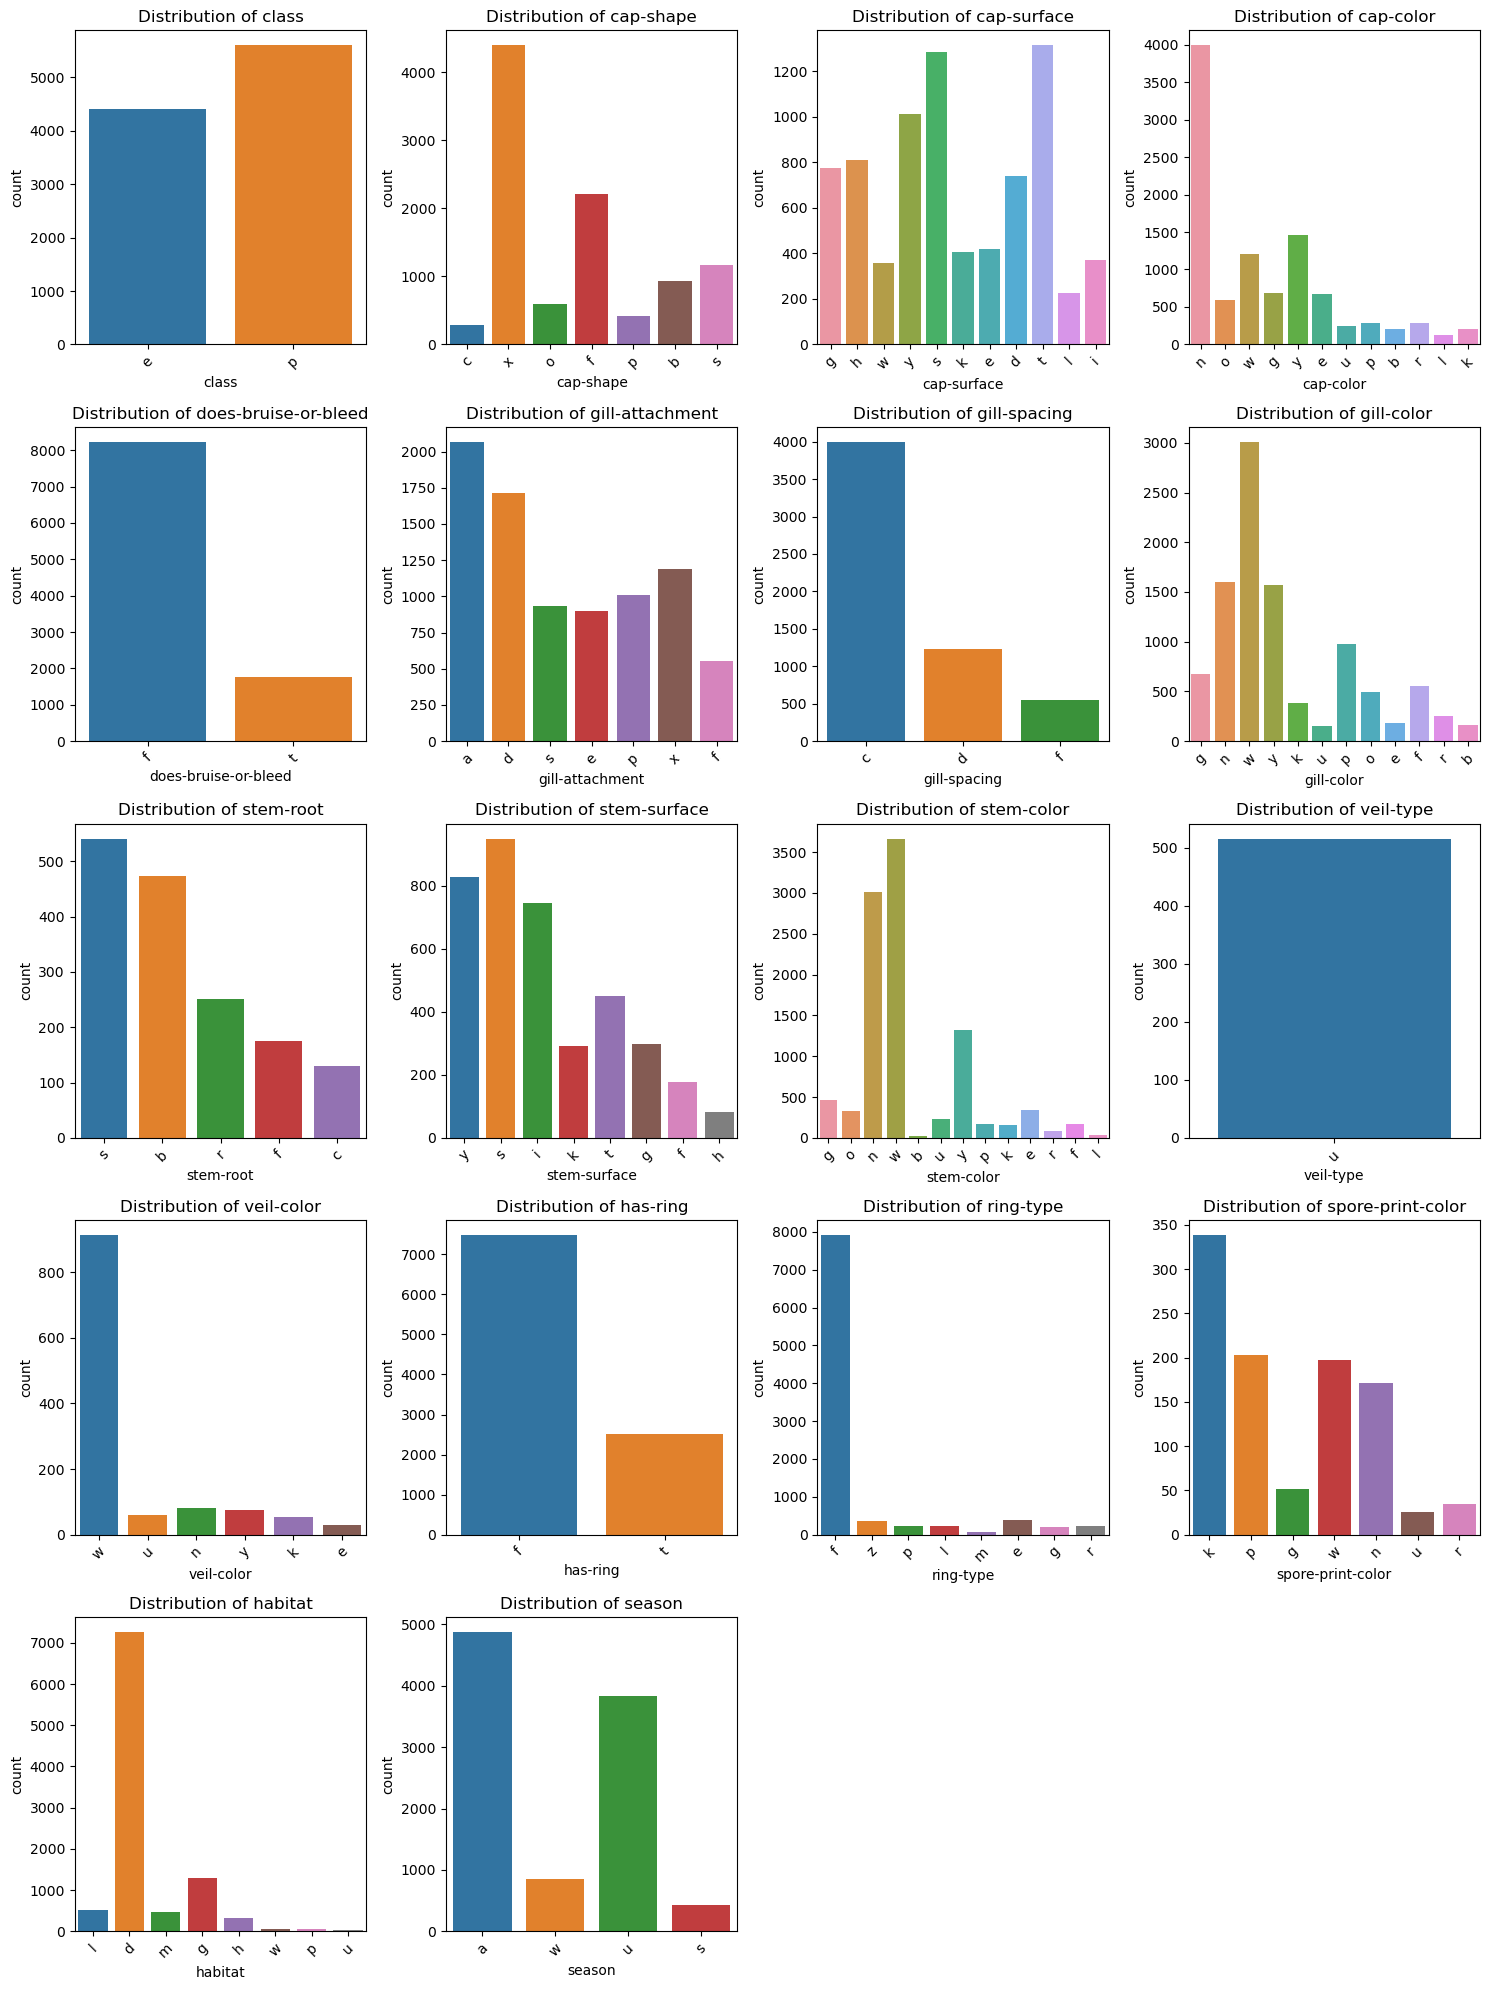

In [79]:
#this gets the list of all the non-numeric variables in the dataset
category_columns = df_sample.select_dtypes(include='object').columns

# for col in category_columns:
#     plt.figure(figsize=(6,4))
#     sns.countplot(data=df_sample, x=col)
#     plt.title(f"Distribution of {col}")
#     plt.xticks(rotation=45)
#     plt.show()

#checks how many plots we need
num_of_columns = len(category_columns)

#this is for setting up the grid, i'm doing for plots per row
rows = (num_of_columns//4) +1 
plt.figure(figsize=(15, rows*4))

#this creates the subplots
for i, col in enumerate(category_columns,1):
    plt.subplot(rows, 4, i)
    sns.countplot(data=df_sample, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

#this displays the plots
plt.tight_layout()
plt.show()

These plots show how each category column (non-numeric column) is distributed across the dataset. Some columns have different categories, while others only have a few common values. Columns that aren't all that different don't neceassarily give the machine learning model alot on information. Columns that show clear differences are more likely to help the model tell the edible and poisionous mushrooms apart.

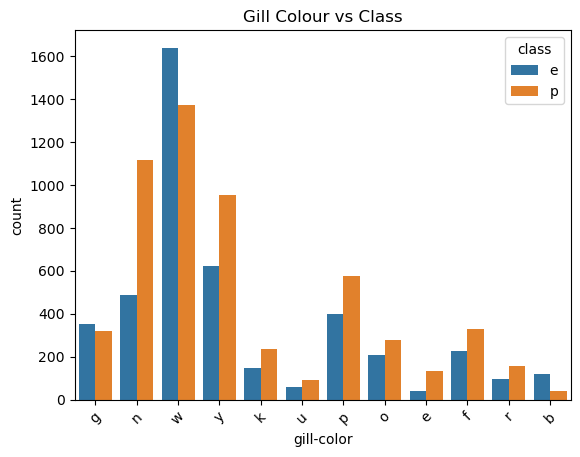

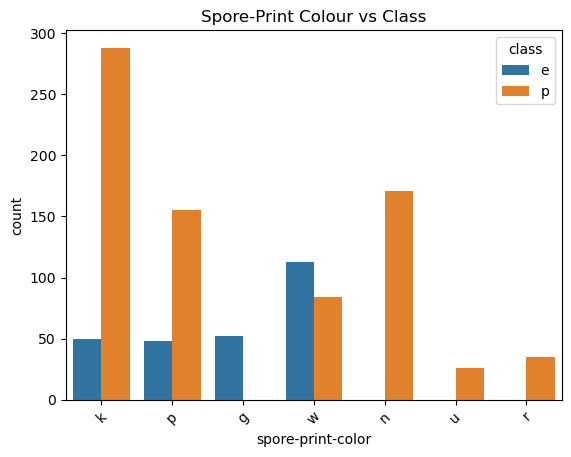

In [80]:
#shows how gill color appears in each class (edible vs poisonous)
sns.countplot(data=df_sample, x='gill-color', hue='class')

#Adds a  title
plt.title("Gill Colour vs Class")

#Turns labels so they'd be easy to read
plt.xticks(rotation=45)

#displays the plot
plt.show()

sns.countplot(data=df_sample, x='spore-print-color', hue='class')
plt.title("Spore-Print Colour vs Class")
plt.xticks(rotation=45)
plt.show()

# sns.countplot(data=df_sample, x='habitat', hue='class')
# plt.title("Habitat vs Class")
# plt.xticks(rotation=45)
# plt.show()

The Exploratory Data Analysis (EDA) shows that the dataset is categorical, all the columns/feautures are written as text lables, and there are no missing values, which makes the data easy to work with. I will also need to convert these labels into numbers before trainng a model. The number of edible and poisionous mushroooms is quite balanced, so I don't need to adjust the classes. Some of the feautures like gill-color, and spore-print-color show very cler differences between the 2 classes, so they will be helpful to the machine learning model. Other features hardly change and may not be every helpful. These findings I've gathered guide hpow I will prepate the data the other questions.

## 3. Model Shortlisting based on EDA.
Instructions: Based on findings from the EDA task in question 2, shortlist three classifiers, and explain choice of classifiers in terms of your findings from the above EDA task.

Once again, the EDA showed that different feautures in the datasset seperate the classes in different ways. Some feautures create very clear splits amd show sharp differences, while others show softer differences. Because of this, it's important to choose classifiers that can capture both simple and more flexible formats and parrtens in the data.

I selected three classifiers that make predictions in different ways. This helps me see which style works best for the kinds of patterns I saw in the visalizations made.

1. DECISION TREE CLASSIFIER.

   A Decision Tree works like a series of simple questions that divide the data into smaller and smaller groups until the machine learning model reaches a final decision. It chooses the questions the questions based on which features split the classes the most. This makes decision trees a very good choice for my dataset beause, in the EDA, some feautures showed clear differences between the edible and poisonos mushrooms. A tree can use these shown strong differences to make correct predictions. This idea is also supported by Qunilan (1986), who describes decision tress as step-by-step 'attribute-based tests' that lead to a final class label.

2. RANDOM FOREST CLASSIFIER.
   
   A Random Forest is a classifier that builds many decision trees and then combines their predictions, making it a forest. Each tree is trained on slightly different data, so the trees learn different patterns. Breiman (2001) explains that a forest works well when the single decision trees are reasonably strong and not way too similar, because the machine learning model can ise the strengths of each decision tree. This reduces errors and improves accuracy. It fits my dataset because the EDA ahowed that several feautures provide useful information, but they don't do that all in the same way. A random Forest can pick up these different patterns across the different trees and produce a more stable and correct result than a single decision tree.

3. LOGISTIC REGRESSION CLASSIFIER.
   
   This is a simple classifier introduced by David Cox (Cox,1958). It is used for yes/no problems, which fits this task because the dataset has two classes (edible or poisonous). The model works by looking at each feauture and estimating how mch it increases or decreases the chance of a mushroom being poisonous. This classifier is a good choice for my dataset because the EDA showed that classes are balanced and that some feautures have clear differences between the two groups. This means a simple classifier like Logistic Regression can still notice these patterns.


## 4. Model Fitting.
Instructions: Fit the chosen three classifiers to the sample data, and explain your choices and assumptions.

In [81]:
x = df_sample.drop('class', axis=1)
y = df_sample['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

dt_model= DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)

ValueError: could not convert string to float: 'x'

## REFERENCES.
1. National Academies of Sciences, Engineering, and Medicine. (2019). Reproducibility and Replicability in Science. Washington, DC: The National Academies Press. p.55.

2. Aurélien Géron. (2019). Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Concepts, Tools,. 2nd ed. Canada: O’Reilly Media. pp.52-60.

3. Peter Waiganjo Wagacha. (2003). Induction of Decision Trees. Nairobi: Institute of Computer Science University of Nairobi. p.3.

4. Quinlan, J.R. (1986) 'Induction of decision trees,' Machine Learning, 1(1), pp. 85–87. https://doi.org/10.1023/a:1022643204877.

5. Breiman, L. (2001) 'Random forests,' Machine Learning, 45(1), pp. 5–12. https://doi.org/10.1023/a:1010933404324.

6. Cox, D.R. (1958) 'The regression analysis of binary sequences,' Journal of the Royal Statistical Society Series B (Statistical Methodology), 20(2), pp. 215–232. https://doi.org/10.1111/j.2517-6161.1958.tb00292.x.

7. Logistic Regression · UC Business Analytics R Programming Guide. https://uc-r.github.io/logistic_regression.
